In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [34]:
dataset=pd.read_csv("IBM Attrition Data.csv")

In [35]:
dataset.head

<bound method NDFrame.head of       Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisfac

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


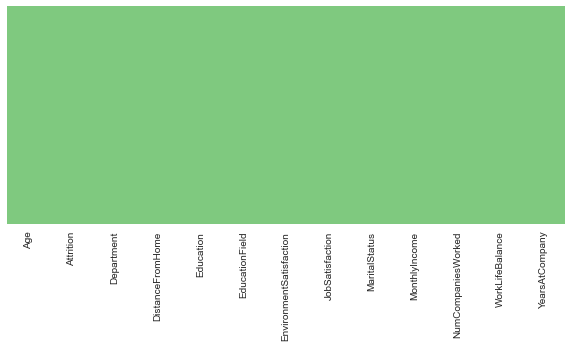

In [37]:
plt.figure(figsize=(10,4))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='Accent')

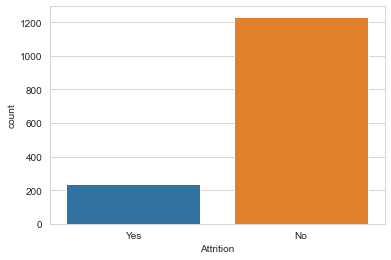

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition',data=dataset)

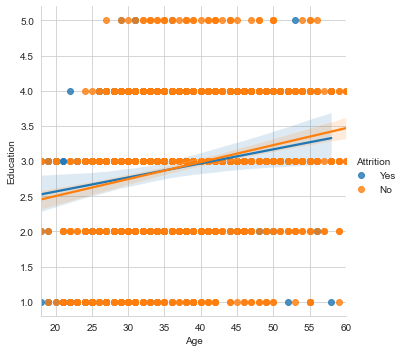

In [39]:
sns.lmplot(x='Age',y='Education',hue='Attrition',data=dataset)

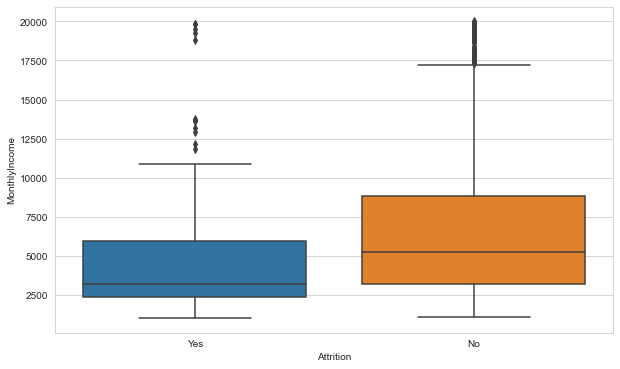

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(y='MonthlyIncome',x='Attrition',data=dataset)

In [41]:
dataset.shape

(1470, 13)

In [42]:
y=dataset.iloc[:,1]
x=dataset
x.drop('Attrition',axis=1,inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [44]:
dum_Department=pd.get_dummies(dataset['Department'],prefix='Department')
dum_EducationField=pd.get_dummies(dataset['EducationField'],prefix='EducationField')
dum_MaritalStatus=pd.get_dummies(dataset['MaritalStatus'],prefix='MaritalStatus')
##Adding these dummy variable to input x
x=pd.concat([x,dum_Department,dum_EducationField,dum_MaritalStatus],axis=1)
##Removing the categorical data
x.drop(['Department','EducationField','MaritalStatus'],axis=1,inplace=True)
print(x.shape)
print(y.shape)

(1470, 21)
(1470,)


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=[] 
cv_scores=[] 
from sklearn.model_selection import cross_val_score 
##perform 10 fold cross validation 
for k in range(1,40,2): 
    neighbors.append(k) 
    knn=KNeighborsClassifier(n_neighbors=k) 
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy') 
    cv_scores.append(scores.mean())
error_rate=[1-x for x in cv_scores] 
##determining the best k 
optimal_k=neighbors[error_rate.index(min(error_rate))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
##plot misclassification error versus k 
plt.figure(figsize=(10,6)) 
plt.plot(range(1,40,2),error_rate,color ='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
def print_score(clf,x_train,y_train,x_test,y_test,train=True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(y_train,clf.predict(x_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,clf.predict(x_train))))
        res=cross_val_score(clf,x_train,y_train,cv = 10,scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train,clf.predict(x_train))))
        print("----------------------------------------------------------")
    elif train==False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(classification_report(y_test,clf.predict(x_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,clf.predict(x_test)))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test,clf.predict(x_test))))
        print("-----------------------------------------------------------")
          
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print_score(knn,x_train,y_train,x_test,y_test,train=True)
print_score(knn,x_train,y_train,x_test,y_test,train=False)